In [1]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt
import json
import os

In [2]:
# read data from .npy files for formaldehyde casci(8,8) calculations
#Drive link for .npy files of LiH

# https://drive.google.com/drive/folders/1NQvqQ4KiXTmZZ3OjCM5nA2dqIs5ete9X?usp=sharing

# !!! Change this to the correct path on your computer!
npy_folder = "/Users/rmandern/code/SCQED-PCQED/LiH_data/"

# these file names should still be good
E_npy_file = npy_folder + "LiH_r_scan_6311g_fci_tight_davidson_Energies.npy"
Mu_npy_file = npy_folder + "LiH_r_scan_6311g_fci_tight_davidson_Dipoles.npy"

# store energy eigenvalues in E_array
E_array = np.load(E_npy_file)
# store dipole matrix elements in Mu_array
Mu_array = np.load(Mu_npy_file)

# print their shape so we know how many elements we have
print(np.shape(E_array))
print(np.shape(Mu_array))
# print(E_array)

(500, 25)
(500, 500, 3, 25)


In [3]:
# setup basic arguments to create an instance of the PFHamiltonianGenerator class
mol_str = """
    Li
    H 1 1.4
    symmetry c1
"""


options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}


cavity_free_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 10, 
}

# create the instance of our PFHamiltonianGenerator class
instance = PFHamiltonianGenerator(mol_str, options_dict, cavity_free_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236296037
CQED-RHF One-electron energy      = -12.6946346236296037
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570473   dE = -7.86054E+00   dRMS = 1.78805E-13
SCF Iteration   2: Energy = -7.8605386610570385   dE =  8.88178E-15   dRMS = 3.97663E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.2550818920135498 seconds
 Completed 1HSO Build in 5.507469177246094e-05 seconds
 Completed ERI Build in 0.0012359619140625 seconds 
 Completed 2D build in 0.0001380443572998047 seconds
 Completed 1G build in 2.09808349609375e-05 seconds
 Completed the Dipole Matrix Build in 4.00543212890625e-05 seconds
 Completed determinant list in 0.0004799365997314453 seconds 
 Completed constant offset matrix in 0.0002770423889160156 se

In [4]:
N_R = 25

d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 500
N_ph = 10
omega = 0.12086
lambda_vector = np.array([0, 0, 0.05])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_50010_dse = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_50010_dse[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

In [5]:
# # write to json file
# file_name = generate_file_name(dictionary)
# json_object = json.dumps(dictionary, indent=4)
# with open(file_name, "w") as outfile:
#     outfile.write(json_object)

In [6]:

d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 100
N_ph = 10
omega = 0.12086
lambda_values = np.linspace(0.001, 0.005, 5)  # Array of lambda values

# Create an array of zeros to store the PCQED eigenvalues for each value of d and lambda
_pcqed_40010_dse = np.zeros((len(lambda_values), N_l, N_el * N_ph))

# Loop over lambda values
for i, lambda_val in enumerate(lambda_values):
    lambda_vector = np.array([0, 0, lambda_val])
    ctr = 0
    # Loop over values of d, build Hamiltonian, capture eigenvalues
    for d in d_array:
        instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector, E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=True)       
        _pcqed_40010_dse[i, ctr, :] = instance.PCQED_pf_eigs
        ctr += 1 

# Now _pcqed_40010_dse contains eigenvalues for different lambda values


In [7]:
N_R = 25
d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 500
N_ph = 2
omega = 0.12086
lambda_vector = np.array([0, 0, 0.05])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_1002_dse = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector ,E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_1002_dse[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

In [8]:
# print(np.shape(_pcqed_5002_dse))

In [9]:
N_R = 25
d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 500
N_ph = 2
omega = 0.12086
lambda_vector = np.array([0, 0, 0.05])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_10021_dse_cs = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_cs_hamiltonian(N_el, N_ph, omega, lambda_vector ,E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_10021_dse_cs[ctr, :] = instance.PCQED_cs_eigs
    ctr += 1

In [10]:

# # perturbative_energy_vals = []
# perturbative_energy_vals_no_dse = []
# for i in range(0, 25):


#     # store energy eigenvalues in E_array
#     E_array_i = E_array[:, i]
#     # store dipole matrix elements in Mu_array
#     Mu_array_i = Mu_array[:,:,:,i]


# #     energy = instance.compute_energy_to_second_order(E_array_i, lambda_vector, Mu_array_i)


#     #scan_nums.append(i)
# #     perturbative_energy_vals.append(energy)
    
#     energy = instance.compute_energy_to_second_order(E_array_i, lambda_vector, Mu_array_i, neglected_DSE_option = False)

    
    
#     perturbative_energy_vals_no_dse.append(energy)

# # print(np.shape(perturbative_energy_vals))

In [11]:
# perturbative_energy_vals_cs = []
# # perturbative_energy_vals_no_dse = []
# for i in range(0, 25):


#     # store energy eigenvalues in E_array
#     E_array_i = E_array[:, i]
#     # store dipole matrix elements in Mu_array
#     Mu_array_i = Mu_array[:,:,:,i]


#     energy = instance.compute_energy_to_second_order(E_array_i, lambda_vector, Mu_array_i, coherent_state=True,neglected_DSE_option = False)


#     #scan_nums.append(i)
#     perturbative_energy_vals_cs.append(energy)
    
# #     energy = instance.compute_energy_to_second_order(E_array_i, lambda_vector, Mu_array_i, neglected_DSE_option = True)

    
    
# #     perturbative_energy_vals_no_dse.append(energy)

# print(np.shape(perturbative_energy_vals_cs))

In [12]:
# plt.plot(d_array, _pcqed_10010_dse[:,0],'ro-', label="Dse_nocs(200,10)")
# # plt.plot(d_array,_pcqed_22_cs[:,0], label='Dse_cs')
# plt.plot(d_array,_pcqed_10010_withoutdse[:,0], 'bo-', label='no_Dse(200,10)')
# # plt.plot(d_array,_pcqed_22_withoutdse_cs[:,0], label='noDse_cs')

# # plt.plot(lambda_val[:,2],_pcqed_502[:,2],'ro-', label='2nd')
# # plt.plot(lambda_val[:,2],_pcqed_502[:,3],'b', label='3rd')
# # plt.plot(lambda_val[:,2],_pcqed_502[:,4],'y', label='4th')

# plt.xlabel('Bondlength')
# plt.ylabel('Energy')
# # plt.ylim(-0.0003, -0.0001)
# plt.grid()
# plt.legend()
# # plt.savefig('LiH_0.03.png')

In [13]:
# json file name
cs_dir = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"
new_cs = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"

pn_dir = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"

ref_file = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"
np10_001_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_w_dse_10_lambda_0.0_0.0_0.01_omega_0.12086.json"
np10_005_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_w_dse_10_lambda_0.0_0.0_0.05_omega_0.12086.json"

np10_001_no_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_no_dse_10_lambda_0.0_0.0_0.01_omega_0.12086.json"
np10_005_no_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_no_dse_10_lambda_0.0_0.0_0.05_omega_0.12086.json"

new_np10_001_dse = json.load(open(np10_001_dse))
new_np10_005_dse = json.load(open(np10_005_dse))
new_np10_001_no_dse = json.load(open(np10_001_no_dse))
new_np10_005_no_dse = json.load(open(np10_005_no_dse))

# reff1 = open(ref_file)
# rdata = json.load(reff1)
# ref_data = np.array(rdata["return_result"])
r_data = np.linspace(1.4, 2.2, 25)

eig_np10_001_dse = np.array(new_np10_001_dse["return_result"])
eig_np10_005_dse = np.array(new_np10_005_dse["return_result"])
eig_np10_001_no_dse = np.array(new_np10_001_no_dse["return_result"])
eig_np10_005_no_dse = np.array(new_np10_005_no_dse["return_result"])

#npth = "C10H8_number_basis_np_0.json"
#npth_data = json.load(open(npth))

#coords = npth_data["molecule"]["coordinates"]
#print(coords)
print(np.shape(eig_np10_001_dse))

(25, 10)


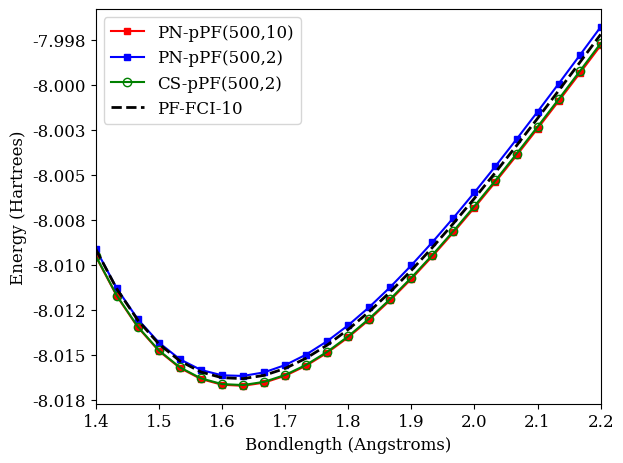

In [19]:
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

plt.plot(d_array, _pcqed_50010_dse[:,0],color='r',marker="s", ms="4",linewidth=1.5, label="PN-pPF(500,10)")
plt.plot(d_array,_pcqed_1002_dse[:,0], color='b', marker="s", ms="4",linewidth=1.5, label='PN-pPF(500,2)')
plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color='g', marker="o", ms="6", mfc="none",markeredgewidth =1,linewidth=1.5, label='CS-pPF(500,2)')

# plt.plot(d_array, _pcqed_50010_dse[:,0],color='r',marker="s", ms="4",linewidth=1.5, label="pRabi(500,10)")
# plt.plot(d_array,_pcqed_1002_dse[:,0], color='b', marker="s", ms="4",linewidth=1.5, label='pRabi(500,2)')


# plt.plot(r_data, eig_np10_001_dse[:,0], "blue", marker="s", ms="5", mfc="none", label='QED-FCI(10,0.01,DSE)')
# plt.plot(r_data, eig_np10_001_no_dse[:,0], 'red', marker="s", ms="5", mfc="none", label='QED-FCI(10,0.01,No_DSE')
plt.plot(r_data, eig_np10_005_dse[:,0],  'black',linestyle='--',linewidth=2,label='PF-FCI-10')
# plt.plot(r_data, eig_np10_005_no_dse[:,0], 'black',linestyle='--', linewidth=2.5, label='PF-FCI-10')

# plt.plot(r_data, perturbative_energy_vals_cs,'orange', marker="*", ms="10", mfc="none",label='DSE perturbative Cs')
# plt.plot(r_data, perturbative_energy_vals_no_dse,'black', marker="*", ms="5", mfc="none",label=' DSE perturbative')

# plt.plot(d_array, _pcqed_1002_dse[:,2],color='k',linestyle='--',linewidth=1.5, label="PCQED Dse(500,10)")
# plt.plot(d_array,_pcqed_10023_dse[:,2], color='y',linestyle='--',linewidth=1.5, label='PCQED Dse(500,2)')
# plt.plot(d_array, _pcqed_5002_dse_cs[:,0], color='m', linestyle='--',linewidth=1.5,label="PCQED Dse Cs(500,2)")




plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)
plt.legend()
plt.tight_layout()
plt.savefig("LiH_QEDFCI_vs_PCQED_vs_pertrubative_nodse_0052_19febfinal.png", dpi=150)
plt.show()



# diff_cs_1 = eig6[:,0]-ref_data[:,0]
# max_cs_1 = max(diff_cs_1)
# min_cs_1 = min(diff_cs_1)
# print(F'CS-1: Max diff {max_cs_1}, Min diff {min_cs_1}, NPE {max_cs_1 - min_cs_1}')


# diff_cs_10 = eig610[:,0]-ref_data[:,0]
# max_cs_10 = max(diff_cs_10)
# min_cs_10 = min(diff_cs_10)
# print(F'CS-10: Max diff {max_cs_10}, Min diff {min_cs_10}, NPE {max_cs_10 - min_cs_10}')

# diff_pn_1 = peig6[:,0]-ref_data[:,0]
# max_pn_1 = max(diff_pn_1)
# min_pn_1 = min(diff_pn_1)
# print(F'PN-1: Max diff {max_pn_1}, Min diff {min_pn_1}, NPE {max_pn_1 - min_pn_1}')

# diff_pn_10 = peig610[:,0]-ref_data[:,0]
# max_pn_10 = max(diff_pn_10)
# min_pn_10 = min(diff_pn_10)
# print(F'PN-10: Max diff {max_pn_10}, Min diff {min_pn_10}, NPE {max_pn_10 - min_pn_10}')


# print(np_mae[3], np_mae10[3], cs_mae[3], cs_mae10[3])

In [15]:
print(_pcqed_5002_dse_cs)
# print(_pcqed_5002_dse)

NameError: name '_pcqed_5002_dse_cs' is not defined

In [ ]:
# print(np.shape(_pcqed_50010_dse[:,0]))
X = d_array
Y = d_array
# Z = _pcqed_50010_dse[:,0]
# print(Z)
X, Y = np.meshgrid(X, Y)
# Z = Z.reshape(len(X), len(Y))
print(np.shape(Z))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, cmap='viridis')

print(np.shape(Z))

In [ ]:
plt.plot(r_data, _pcqed_10010_withoutdse[:,0]-eig_np10_005_no_dse[:,0],"bo-", label='No DSE Difference, PCQED vs QED-FCI')
plt.plot(r_data, _pcqed_10010_dse[:,0]-eig_np10_005_dse[:,0],"black", marker="s", ms="5", mfc="none", label='DSE Difference, PCQED vs QED-FCI')


plt.plot(r_data, eig_np10_005_no_dse[:,0]-perturbative_energy_vals[:,0],"red", marker="s", ms="5", mfc="none", label='No DSE Difference, PCQED vs QED-FCI')
# plt.plot(r_data, eig_np10_005_dse[:,0]-perturbative_energy_vals_no_dse[:,0],"blue", marker="s", ms="5", mfc="none", label='DSE_Difference(0.05)')
# plt.plot(r_data, _pcqed_10010_withoutdse[:,0]-eig_np10_005_no_dse[:,0], "red", marker="s", ms="5", mfc="none",label='No_DSE_Difference(0.05)')


plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Error (Hartrees)")
# plt.xlim(1.4, 2.0)
# plt.ylim(-7.982, -7.965)
plt.legend()
plt.tight_layout()
plt.savefig("LiH_QEDFCI_vs_PCQED_400_vs_5000.png", dpi=150)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [ ]:
# np.allclose(new_eig5_pnnp_10, peig510)